In [4]:
import os
import numpy as np
import pandas as pd
import nibabel as nib

def create_csv(indices, output_path):
   columns=['case_id','LVEDV (mL)', 'LVESV (mL)', 'LVSV (mL)', 'LVEF (%)', 'LVM (g)', 'RVEDV (mL)', 'RVESV (mL)', 'RVSV (mL)', 'RVEF (%)'
                           ]
   df = pd.DataFrame(columns=columns)
   df.loc[0] = indices

   csvFilePath = output_path
   if not os.path.isfile(csvFilePath):
       df.to_csv(csvFilePath, sep=',', index=False)
   else:
       df.to_csv(csvFilePath, mode='a', sep=',', header=False, index=False)


import pandas as pd
import pathlib
import re
import numpy as np

def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

def load_folder(folder, ext = '*'):
    paths = pathlib.Path(folder).glob(ext)
    paths = [str(path) for path in paths]
    paths.sort(key = natural_key)

    return paths

predictions = load_folder("../Dataset/LV_RV_Masks/")

for subject in predictions:
    pid = subject.split('/')[-1]

    factor = 0.5
    
    tps = load_folder(subject, "*/*.nii.gz")
    tps.sort(key=lambda f: int(re.sub('\D', '', f)))

    ed_name = tps[0]
    es_name = tps[1]
    
    # ED mask
    nim = nib.load(ed_name)
    pixdim = nim.header['pixdim'][1:4]
    pixel_volume = pixdim[0] * pixdim[1] * pixdim[2] * 1e-3
    density = 1.05
    seg_ed = nib.load(ed_name).get_fdata()

    # ES mask
    nim = nib.load(es_name)
    seg_es = nib.load(es_name).get_fdata()
    
    z_lvedv = [1.04526259, 4.67329476]
    z_lvesv = [1.0544132,  1.53075955]
    z_myo = [0.87231604, -9.9720878 ]
    
    p_lvedv = np.poly1d(z_lvedv)
    p_lvesv = np.poly1d(z_lvesv)
    p_myo = np.poly1d(z_myo)
    
    
    LVEDV = p_lvedv(np.sum(seg_ed[:, :, :] == 50) * pixel_volume)
    LVM = p_myo(np.sum(seg_ed[:, :, :] == 250) * pixel_volume * density)
    RVEDV = np.sum(seg_ed[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_ed[:, :, :] == 150) * pixel_volume * factor
                    
    LVESV = p_lvesv(np.sum(seg_es[:, :, :] == 50) * pixel_volume)
    RVESV = np.sum(seg_es[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_es[:, :, :] == 150) * pixel_volume * factor                      
    
    LVSV =   LVEDV -  LVESV 
    LVEF =   LVSV / LVEDV * 100
    RVSV = RVEDV - RVESV
    RVEF = RVSV / RVEDV * 100
    
    indices = [pid, LVEDV, LVESV, LVSV, LVEF, LVM, RVEDV, RVESV, RVSV, RVEF]   

    create_csv(indices, '../CardiacIndexes/LVRV_GT.csv')


In [5]:
predictions = load_folder("../Predictions/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/Masks/")

for subject in predictions:
    pid = subject.split('/')[-1]

    factor = 0.5
    
    tps = load_folder(subject, "*/*.nii.gz")
    tps.sort(key=lambda f: int(re.sub('\D', '', f)))

    ed_name = tps[0]
    es_name = tps[1]
    
    # ED mask
    nim = nib.load(ed_name)
    pixdim = nim.header['pixdim'][1:4]
    pixel_volume = pixdim[0] * pixdim[1] * pixdim[2] * 1e-3
    density = 1.05
    seg_ed = nib.load(ed_name).get_fdata()

    # ES mask
    nim = nib.load(es_name)
    seg_es = nib.load(es_name).get_fdata()
    
    z_lvedv = [1.04526259, 4.67329476]
    z_lvesv = [1.0544132,  1.53075955]
    z_myo = [0.87231604, -9.9720878 ]
    
    p_lvedv = np.poly1d(z_lvedv)
    p_lvesv = np.poly1d(z_lvesv)
    p_myo = np.poly1d(z_myo)
    
    
    LVEDV = p_lvedv(np.sum(seg_ed[:, :, :] == 50) * pixel_volume)
    LVM = p_myo(np.sum(seg_ed[:, :, :] == 250) * pixel_volume * density)
    RVEDV = np.sum(seg_ed[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_ed[:, :, :] == 150) * pixel_volume * factor
                    
    LVESV = p_lvesv(np.sum(seg_es[:, :, :] == 50) * pixel_volume)
    RVESV = np.sum(seg_es[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_es[:, :, :] == 150) * pixel_volume * factor                      
    
    LVSV =   LVEDV -  LVESV 
    LVEF =   LVSV / LVEDV * 100
    RVSV = RVEDV - RVESV
    RVEF = RVSV / RVEDV * 100
    
    indices = [pid, LVEDV, LVESV, LVSV, LVEF, LVM, RVEDV, RVESV, RVSV, RVEF]   

    create_csv(indices, '../CardiacIndexes/LVRV_ours.csv')

In [6]:
predictions = load_folder("../Predictions/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/Masks/")

for subject in predictions:
    pid = subject.split('/')[-1]

    factor = 0.5
    
    tps = load_folder(subject, "*/*.nii.gz")
    tps.sort(key=lambda f: int(re.sub('\D', '', f)))

    ed_name = tps[0]
    es_name = tps[1]
    
    id = ed_name.split('/')[-3]
    t1 = ed_name.split('/')[-2]
    t2 = es_name.split('/')[-2]
    
    ed_name = "../Predictions/MCSI_Net/" + id + "_" + t1 + "_seg.nii.gz"
    es_name = "../Predictions/MCSI_Net/" + id + "_" + t2 + "_seg.nii.gz"
    
    # ED mask
    nim = nib.load(ed_name)
    pixdim = nim.header['pixdim'][1:4]
    pixel_volume = pixdim[0] * pixdim[1] * pixdim[2] * 1e-3
    density = 1.05
    seg_ed = nib.load(ed_name).get_fdata()

    # ES mask
    nim = nib.load(es_name)
    seg_es = nib.load(es_name).get_fdata()
    
    z_lvedv = [1.04526259, 4.67329476]
    z_lvesv = [1.0544132,  1.53075955]
    z_myo = [0.87231604, -9.9720878 ]
    
    p_lvedv = np.poly1d(z_lvedv)
    p_lvesv = np.poly1d(z_lvesv)
    p_myo = np.poly1d(z_myo)
    
    
    LVEDV = p_lvedv(np.sum(seg_ed[:, :, :] == 50) * pixel_volume)
    LVM = p_myo(np.sum(seg_ed[:, :, :] == 250) * pixel_volume * density)
    RVEDV = np.sum(seg_ed[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_ed[:, :, :] == 150) * pixel_volume * factor
                    
    LVESV = p_lvesv(np.sum(seg_es[:, :, :] == 50) * pixel_volume)
    RVESV = np.sum(seg_es[:, :, :] == 100) * pixel_volume + \
        np.sum(seg_es[:, :, :] == 150) * pixel_volume * factor                      
    
    LVSV =   LVEDV -  LVESV 
    LVEF =   LVSV / LVEDV * 100
    RVSV = RVEDV - RVESV
    RVEF = RVSV / RVEDV * 100
    
    indices = [pid, LVEDV, LVESV, LVSV, LVEF, LVM, RVEDV, RVESV, RVSV, RVEF]   

    create_csv(indices, '../CardiacIndexes/LVRV_MCSI_Net.csv')

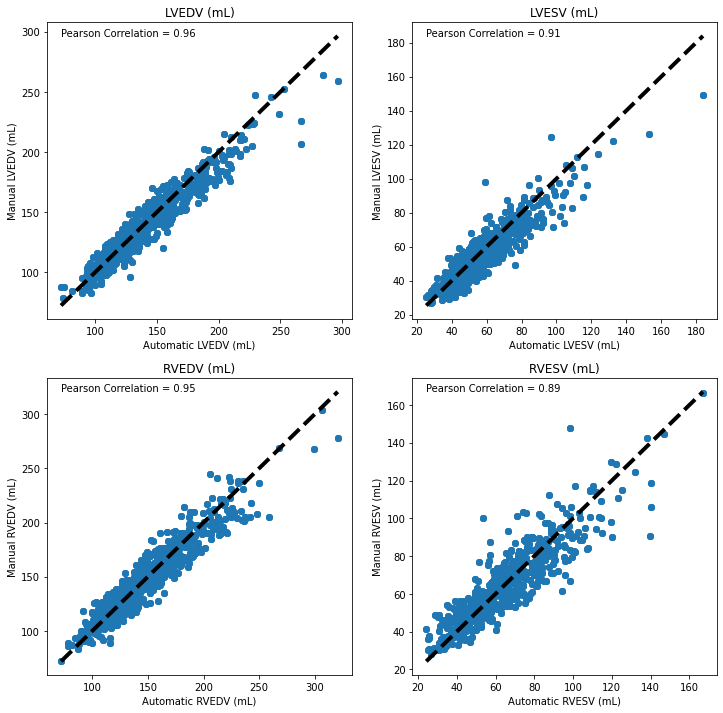

In [7]:
from scipy.stats import pearsonr
import numpy as np

df1 = pd.read_csv('../CardiacIndexes/LVRV_ours.csv')
df2 = pd.read_csv('../CardiacIndexes/LVRV_GT.csv')

metrics = ['LVEDV (mL)', 'LVESV (mL)', 'RVEDV (mL)', 'RVESV (mL)']

import matplotlib.pyplot as plt 

plt.figure(figsize = (12, 12))

for i in range(0, 4):
    ax = plt.subplot(2, 2, 1 + i)
    y_gt = df2[metrics[i]].to_numpy()
    y_pred = df1[metrics[i]].to_numpy()
    
    plt.scatter(y_gt, y_pred)
    plt.ylabel("Manual " + metrics[i])
    plt.xlabel("Automatic " + metrics[i])
    
    ax.plot([y_gt.min(), y_gt.max()], [y_gt.min(), y_gt.max()], 'k--', lw=4)
    ax.annotate("Pearson Correlation = {:.2f}".format(pearsonr(y_gt, y_pred)[0]), (y_gt.min(), y_gt.max()))
    
    #a, b = np.polyfit(y_pred, y_gt, 1)
    #ax.annotate("y = %.2f x + %.2f"%(a,b), (0.7 * y_gt.max(), y_gt.min()))
    
    plt.title(metrics[i])
    

In [12]:

def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(0)
    df_std = df_std.round(0)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]).split('.')[0]
            std_str = str(df_std.loc[model, metric]).split('.')[0]
            #if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
            #    mean_str += '0'
            #if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
            #    std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics =  ['LVEDV (mL)', 'LVESV (mL)', 'LVSV (mL)', 'LVEF (%)', 'LVM (g)', 
            'RVEDV (mL)', 'RVESV (mL)', 'RVSV (mL)', 'RVEF (%)']

df1["Model"] = "Ours"
df2["Model"] = "GT"
df3 = pd.read_csv('../CardiacIndexes/LVRV_MCSI_Net.csv')
df3["Model"] = "MCSI-Net"

get_nice_dataframe(pd.concat([df2, df1, df3]), metrics, vertical = True)

,GT,Ours,MCSI-Net
LVEDV (mL),145 (34),142 (31),144 (31)
LVESV (mL),59 (18),57 (16),59 (16)
LVSV (mL),85 (19),85 (18),86 (19)
LVEF (%),59 (5),60 (5),60 (5)
LVM (g),88 (25),86 (22),90 (21)
RVEDV (mL),150 (39),149 (36),152 (36)
RVESV (mL),65 (22),65 (20),62 (20)
RVSV (mL),85 (21),84 (19),90 (20)
RVEF (%),57 (6),57 (5),60 (6)
